In [1]:
import pandas as pd
import pickle
import gc

In [2]:
lda = pd.read_pickle('../../data/topic_distr_17_index.pkl') #this is just june and july, and we will use these indices to join up the other data
lda.head()

,index,tokens_lemma,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2490481,"[even, hate, trump, could, least, acknowledge,...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172219,0.000000,0.119570,0.301081,0.000000,0.348291,0.000000,0.000000
1,2490482,"[heterosexual, reproduction, mystery, admins, ...",0.000000,0.000000,0.000000,0.188648,0.000000,0.000000,0.197888,0.000000,0.000000,0.000000,0.000000,0.000000,0.237400,0.248296,0.000000,0.000000,0.000000
2,2490483,"[expecting, actual, pope]",0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.764614,0.014712,0.014712,0.014712,0.014712
3,2490484,"[fruitful, multiply, fruity, blow, guy]",0.000000,0.000000,0.843006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2490485,"[term, completely, lost, meaning, generalizati...",0.000000,0.000000,0.000000,0.731009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
lda.set_index('index', inplace = True)

In [4]:
lda.drop(columns='tokens_lemma', inplace=True)
lda = lda.add_prefix('lda_')
lda.head()

,lda_0,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9,lda_10,lda_11,lda_12,lda_13,lda_14,lda_15,lda_16
index,,,,,,,,,,,,,,,,,
2490481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172219,0.000000,0.119570,0.301081,0.000000,0.348291,0.000000,0.000000
2490482,0.000000,0.000000,0.000000,0.188648,0.000000,0.000000,0.197888,0.000000,0.000000,0.000000,0.000000,0.000000,0.237400,0.248296,0.000000,0.000000,0.000000
2490483,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.764614,0.014712,0.014712,0.014712,0.014712
2490484,0.000000,0.000000,0.843006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2490485,0.000000,0.000000,0.000000,0.731009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
posts_df = pd.read_pickle('../../data/combined_bigquery_processed.pkl') #this is the whole year
posts_df.columns


Index(['selftext', 'score_hidden', 'archived', 'name', 'author',
       'author_flair_text', 'downs', 'created_utc', 'subreddit_id', 'link_id',
       'parent_id', 'score', 'retrieved_on', 'controversiality', 'gilded',
       'id', 'subreddit', 'ups', 'distinguished', 'author_flair_css_class',
       'created_date', 'post_type'],
      dtype='object')

In [6]:
posts_df = posts_df.loc[:, ['created_date', 'score', 'controversiality', 'selftext', 'author','author_flair_text','author_flair_css_class','distinguished','gilded']]
posts_df.head()

,created_date,score,controversiality,selftext,author,author_flair_text,author_flair_css_class,distinguished,gilded
0,2019-01-31,3,0,"Another one of their smug, preachy ass headlin...",ThisIsTedSpeaking,GA,georgia-us-state,NaN,0
1,2019-02-03,9,0,enema has been pretending to be a rapper for y...,mastermeatlock,VA,virginia,NaN,0
2,2019-02-03,3,0,That area from Abilene to border (I-20 to I-10...,txladyvoter,#45,MURICA,NaN,0
3,2019-02-02,1,0,She's got the politician fist point down,Tdaccount841,SC,south-carolina,NaN,0
4,2019-02-09,4,0,Imagine getting paid to drop three words on a ...,Ask_If_Im_A_Cactus,Кактус,ivanka,NaN,0


In [7]:
combined_df = lda.merge(posts_df, how = 'left', left_index = True, right_index = True)

In [8]:
combined_df.head()

,lda_0,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9,...,lda_16,created_date,score,controversiality,selftext,author,author_flair_text,author_flair_css_class,distinguished,gilded
index,,,,,,,,,,,,,,,,,,,,,
2490481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172219,...,0.000000,2019-07-13,1,0,Even if they hate Trump they could at least ac...,VoteRepublicanAgain,WI,wisconsin,NaN,0
2490482,0.000000,0.000000,0.000000,0.188648,0.000000,0.000000,0.197888,0.000000,0.000000,0.000000,...,0.000000,2019-07-02,4,0,Heterosexual reproduction is a mystery to admi...,lalicat,Mayo Pride ��,teambtfo,NaN,0
2490483,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,0.014712,2019-07-15,3,0,Were you expecting the actual pope?,iMattApp,NC,north-carolina,NaN,0
2490484,0.000000,0.000000,0.843006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2019-07-22,9,0,"Be fruitful and multiply, not fruity and blow ...",cow_moo_moo,bunch of bricks,treadonme,NaN,0
2490485,0.000000,0.000000,0.000000,0.731009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2019-07-28,8,0,The term has completely lost all meaning. It's...,desterion,IL,illinois,NaN,0


In [9]:
del lda
del posts_df
gc.collect()

75

In [10]:
textblob = pd.read_pickle('../../data/textblob_cleaned_sentiment.pkl') #this is the whole year
combined_df = combined_df.merge(textblob, how = 'left', left_index = True, right_index = True)
combined_df.head()

,lda_0,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9,...,score,controversiality,selftext,author,author_flair_text,author_flair_css_class,distinguished,gilded,sentiment,objectivity
index,,,,,,,,,,,,,,,,,,,,,
2490481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172219,...,1,0,Even if they hate Trump they could at least ac...,VoteRepublicanAgain,WI,wisconsin,NaN,0,-0.366667,0.475
2490482,0.000000,0.000000,0.000000,0.188648,0.000000,0.000000,0.197888,0.000000,0.000000,0.000000,...,4,0,Heterosexual reproduction is a mystery to admi...,lalicat,Mayo Pride ��,teambtfo,NaN,0,0.000000,0.000
2490483,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,3,0,Were you expecting the actual pope?,iMattApp,NC,north-carolina,NaN,0,0.000000,0.100
2490484,0.000000,0.000000,0.843006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9,0,"Be fruitful and multiply, not fruity and blow ...",cow_moo_moo,bunch of bricks,treadonme,NaN,0,0.000000,0.000
2490485,0.000000,0.000000,0.000000,0.731009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8,0,The term has completely lost all meaning. It's...,desterion,IL,illinois,NaN,0,0.100000,0.400


In [11]:
del textblob
gc.collect()

30

In [12]:
lexicon = pd.read_pickle('../../data/flashtext_all_extant_posts.pkl') #this is the whole year

In [13]:
combined_df = combined_df.merge(lexicon, how = 'left', left_index = True, right_index = True)
combined_df.head()

,lda_0,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9,...,objectivity,Stoicism,Physical_Violence,Hostility,Homophobia,Sexual_Violence,Patriarchy,Belitting,Racism,Flipping_the_Narrative
index,,,,,,,,,,,,,,,,,,,,,
2490481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172219,...,0.475,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2490482,0.000000,0.000000,0.000000,0.188648,0.000000,0.000000,0.197888,0.000000,0.000000,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2490483,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,0.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2490484,0.000000,0.000000,0.843006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2490485,0.000000,0.000000,0.000000,0.731009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
del lexicon
gc.collect()

45

In [15]:
combined_df.columns

Index(['lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7',
       'lda_8', 'lda_9', 'lda_10', 'lda_11', 'lda_12', 'lda_13', 'lda_14',
       'lda_15', 'lda_16', 'created_date', 'score', 'controversiality',
       'selftext', 'author', 'author_flair_text', 'author_flair_css_class',
       'distinguished', 'gilded', 'sentiment', 'objectivity', 'Stoicism',
       'Physical_Violence', 'Hostility', 'Homophobia', 'Sexual_Violence',
       'Patriarchy', 'Belitting', 'Racism', 'Flipping_the_Narrative'],
      dtype='object')

We don't need to worry about normalizing our LDA variables - they represent a probability of membership to each of the 17 LDA groups, and therefore are bounded between 0 and 1 alread. 

In [16]:
combined_df.iloc[:,:18].describe()

,lda_0,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9,lda_10,lda_11,lda_12,lda_13,lda_14,lda_15,lda_16
count,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06
mean,5.598907e-02,5.218840e-02,5.601064e-02,7.662236e-02,6.131189e-02,4.996753e-02,4.019342e-02,3.236712e-02,2.836986e-02,4.143155e-02,4.242489e-02,6.060859e-02,6.406666e-02,5.742337e-02,1.195191e-01,6.783087e-02,4.964450e-02
std,1.191921e-01,1.157835e-01,1.216524e-01,1.490337e-01,1.308174e-01,1.072881e-01,9.019935e-02,7.769033e-02,7.315120e-02,9.096331e-02,9.495507e-02,1.235780e-01,1.333920e-01,1.221734e-01,1.941733e-01,1.342559e-01,1.088854e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.176896e-02,1.176739e-02,1.176922e-02,1.470661e-02,1.177116e-02,1.176982e-02,1.176695e-02,1.176515e-02,1.176491e-02,1.176725e-02,1.176701e-02,1.177956e-02,1.177327e-02,1.177096e-02,1.472057e-02,1.180195e-02,1.176787e-02
75%,2.941801e-02,2.941357e-02,2.941573e-02,5.882353e-02,2.941586e-02,2.941375e-02,2.941238e-02,1.963318e-02,1.961678e-02,2.941251e-02,2.941243e-02,2.942041e-02,2.942750e-02,2.941598e-02,1.869836e-01,5.882353e-02,2.941358e-02
max,9.916661e-01,9.859524e-01,9.916709e-01,9.714763e-01,9.696284e-01,9.940041e-01,9.993358e-01,9.988250e-01,9.607824e-01,9.982794e-01,9.275998e-01,9.551635e-01,9.972556e-01,9.874504e-01,9.943903e-01,9.938481e-01,9.572191e-01


In [17]:
combined_df.iloc[:,18:].describe()

,score,controversiality,gilded,sentiment,objectivity,Stoicism,Physical_Violence,Hostility,Homophobia,Sexual_Violence,Patriarchy,Belitting,Racism,Flipping_the_Narrative
count,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06
mean,9.639845e+00,6.233849e-03,5.503771e-05,5.252166e-02,3.652273e-01,4.370524e-03,3.824458e-02,5.385937e-02,2.876549e-03,4.917586e-03,5.424198e-04,9.485716e-03,1.702853e-02,1.235364e-03
std,3.198450e+01,7.870827e-02,7.418539e-03,2.799622e-01,3.204611e-01,7.086016e-02,2.240726e-01,3.298282e-01,6.082607e-02,8.321755e-02,2.412286e-02,1.074069e-01,1.675996e-01,3.676781e-02
min,-2.120000e+02,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.916667e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.000000e+00,0.000000e+00,0.000000e+00,1.666667e-01,6.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.122000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,1.300000e+01,2.400000e+02,1.200000e+01,1.000000e+01,3.000000e+00,1.400000e+01,2.400000e+01,4.000000e+00


In [18]:
combined_df.iloc[:,28:].applymap(lambda x: x != float(0)).apply(sum, axis = 'rows') / len(combined_df)

Stoicism                  0.004127
Physical_Violence         0.033604
Hostility                 0.047584
Homophobia                0.002610
Sexual_Violence           0.004233
Patriarchy                0.000523
Belitting                 0.008713
Racism                    0.013905
Flipping_the_Narrative    0.001184
dtype: float64

Due to the extremely sparse nature of these data, we are going to make them booleans instead of counts (ie, presence/absence of the words in each lexicon category).


In [19]:
combined_df.iloc[:,28:] = combined_df.iloc[:,28:].applymap(lambda x: int(x != float(0)))

<AxesSubplot:xlabel='score', ylabel='Count'>

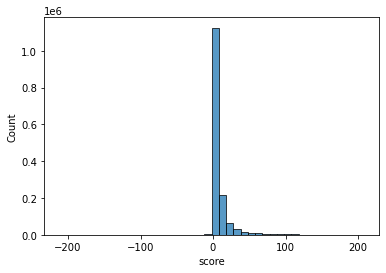

In [20]:
import seaborn as sns
sns.histplot(data=combined_df[combined_df['score'] < 200], x = 'score', binwidth = 10)

In [21]:
#heavily zero-inflated, log-normalizing will probably work, but we need to do something about the negative scores. they are relatively uncommon, but we still want to 
import math
combined_df['log2p1_score'] = combined_df['score'].apply(lambda x: math.log2(abs(x) + 1))
combined_df['logp1_score'] = combined_df['score'].apply(lambda x: math.log(abs(x) + 1))


In [22]:
combined_df['downvoted'] = (combined_df['score'] < 0).apply(int)

<AxesSubplot:xlabel='log2p1_score', ylabel='Count'>

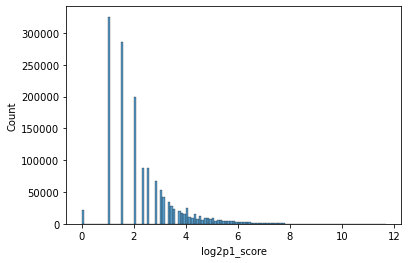

In [23]:
sns.histplot(data=combined_df, x = 'log2p1_score', binwidth = .1)

<AxesSubplot:xlabel='logp1_score', ylabel='Count'>

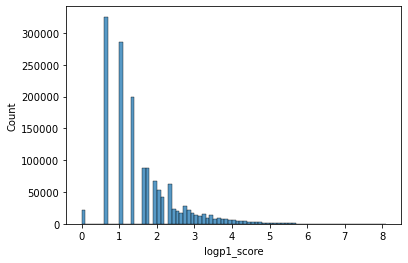

In [24]:
sns.histplot(data=combined_df, x = 'logp1_score', binwidth=.1)

neither look very good... let's use some scaling tools from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer). 

In [25]:
from sklearn.preprocessing import PowerTransformer
# power_transformed_score = PowerTransformer().fit_transform(combined_df['score'].apply(abs).to_frame())
power_transformed_score = PowerTransformer(standardize=True, method = 'yeo-johnson')\
    .fit_transform(combined_df['score'].apply(abs).to_frame())
power_transformed_score

array([[-1.20760424],
       [ 0.17136274],
       [-0.11216842],
       ...,
       [ 0.54667411],
       [-0.52419976],
       [ 0.88503994]])

In [26]:
combined_df.loc[:,['pt_score']] = power_transformed_score[:,0]

<AxesSubplot:xlabel='pt_score', ylabel='Count'>

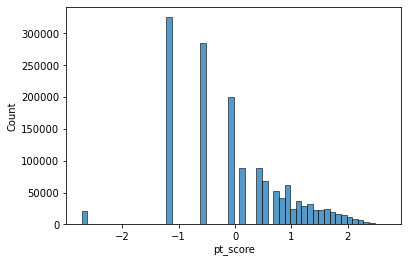

In [27]:
sns.histplot(data=combined_df, x = 'pt_score', binwidth=.1)
#still skewed but definitely looks better

In [28]:
del power_transformed_score
gc.collect()

230

In [29]:
#let's check mean and variance for unit-ness
combined_df['pt_score'].mean(), combined_df['pt_score'].var() #perfect

(9.546402776590087e-16, 1.000000663105349)

In [30]:
#cleaning up the last few columns...
pd.unique(combined_df['distinguished'])

array([nan, 'moderator'], dtype=object)

In [31]:
combined_df['moderator'] = (combined_df['distinguished'] == 'moderator').apply(int)

In [32]:
combined_df.drop(columns = 'distinguished', inplace = True)
pd.unique(combined_df['moderator'])

array([0, 1])

In [33]:
combined_df.drop(columns = ['log2p1_score', 'logp1_score'], inplace = True)
combined_df.head()

,lda_0,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9,...,Hostility,Homophobia,Sexual_Violence,Patriarchy,Belitting,Racism,Flipping_the_Narrative,downvoted,pt_score,moderator
index,,,,,,,,,,,,,,,,,,,,,
2490481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172219,...,1,0,0,0,0,0,0,0,-1.207604,0
2490482,0.000000,0.000000,0.000000,0.188648,0.000000,0.000000,0.197888,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0.171363,0
2490483,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,0,0,0,0,0,0,0,0,-0.112168,0
2490484,0.000000,0.000000,0.843006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0.885040,0
2490485,0.000000,0.000000,0.000000,0.731009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0.790891,0


In [34]:
# The thing we really care about with authors are whether they are frequent posters or noobs
poster_counts = combined_df.groupby('author')['score'].agg(['count','mean'])

In [35]:
poster_counts = poster_counts.add_prefix('user_')
poster_counts = poster_counts.reset_index('author')
poster_counts.head()

,author,user_count,user_mean
0,-------------------c,31,10.774194
1,-----------_---,1,-1.000000
2,---______--,20,12.250000
3,---charlie,1,3.000000
4,--24,1,1.000000


<AxesSubplot:xlabel='user_count', ylabel='Count'>

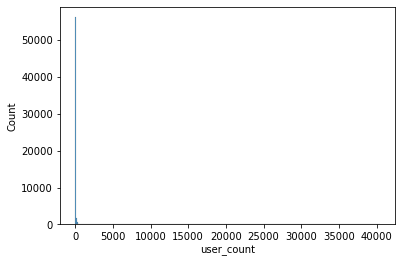

In [36]:
sns.histplot(data=poster_counts, x = 'user_count', binwidth=100)

In [37]:
poster_counts.sort_values('user_count', ascending=False).head()

,author,user_count,user_mean
34283,[deleted],40392,8.982868
1445,ActivatedJoeBot,4664,5.538808
8235,DiamondsOnTheFloor,3172,6.829445
36859,bobadobalina,3110,5.759486
21970,OhLollyLollyPop,3098,4.512589


In [38]:
#We will need to drop and impute deleted author counts/means
poster_counts = poster_counts[poster_counts['author'] != '[deleted]']

<AxesSubplot:xlabel='user_count', ylabel='Count'>

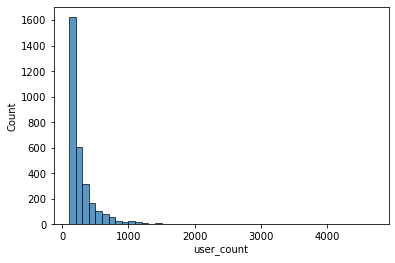

In [39]:
#HEAVILY zero-inflated... the vast majority of users don't post much
sns.histplot(data=poster_counts[poster_counts['user_count'] > 100], x = 'user_count', binwidth=100)

<AxesSubplot:xlabel='user_mean', ylabel='Count'>

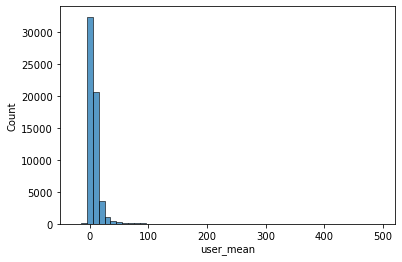

In [40]:
sns.histplot(data=poster_counts[poster_counts['user_mean'] < 500], x = 'user_mean', binwidth=10)

In [41]:
combined_df.reset_index(inplace=True)
combined_df = combined_df.merge(poster_counts, on = 'author', how = 'left')

In [42]:
combined_df.head()

,index,lda_0,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,...,Sexual_Violence,Patriarchy,Belitting,Racism,Flipping_the_Narrative,downvoted,pt_score,moderator,user_count,user_mean
0,2490481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,-1.207604,0,117.0,6.401709
1,2490482,0.000000,0.000000,0.000000,0.188648,0.000000,0.000000,0.197888,0.000000,0.000000,...,0,0,0,0,0,0,0.171363,0,241.0,22.634855
2,2490483,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,0,0,0,0,0,0,-0.112168,0,260.0,13.365385
3,2490484,0.000000,0.000000,0.843006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0.885040,0,679.0,13.443299
4,2490485,0.000000,0.000000,0.000000,0.731009,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0.790891,0,325.0,22.556923


In [43]:
combined_df.set_index('index', inplace = True)
combined_df.head()
combined_df = combined_df.sort_index()
combined_df['downvoted_user'] = (combined_df['user_mean'] < 0).apply(int)

In [44]:
#as before, use Sklearn's PowerTransformer. Since we want the mean and variance to be 1 and 0 with respect to posts, not users, we normalize the combined vars and not the aggregated vars.
power_transformed_meancount = PowerTransformer(standardize=True, method = 'yeo-johnson')\
    .fit_transform(combined_df.loc[:,['user_count', 'user_mean']].applymap(abs))
power_transformed_meancount

array([[-0.21491382, -0.42087583],
       [ 0.24712091,  1.78551864],
       [ 0.2980716 ,  0.8297231 ],
       ...,
       [ 0.54314796,  1.06730854],
       [-0.12209079, -0.78450315],
       [ 1.34256839,  0.95808468]])

In [45]:
combined_df.loc[:,['pt_user_count', 'pt_user_mean']] = power_transformed_meancount

In [46]:
#check on those [deleted] users
combined_df[combined_df['author'] == '[deleted]'].loc[:,['pt_user_count', 'pt_user_mean']].head()

,pt_user_count,pt_user_mean
index,,
2590027,NaN,NaN
2590031,NaN,NaN
2590076,NaN,NaN
2590191,NaN,NaN
2590236,NaN,NaN


In [47]:
median_user_count = combined_df['pt_user_count'].median()
median_user_mean = combined_df['pt_user_mean'].median()

In [48]:
combined_df.loc[:,'pt_user_count'] = combined_df.loc[:,'pt_user_count'].fillna(median_user_count)
combined_df.loc[:,'pt_user_mean'] = combined_df.loc[:,'pt_user_mean'].fillna(median_user_mean)

In [49]:
combined_df[combined_df['author'] == '[deleted]'].loc[:,['pt_user_count', 'pt_user_mean']].head()

,pt_user_count,pt_user_mean
index,,
2590027,0.026301,-0.001592
2590031,0.026301,-0.001592
2590076,0.026301,-0.001592
2590191,0.026301,-0.001592
2590236,0.026301,-0.001592


<AxesSubplot:xlabel='pt_user_count', ylabel='Count'>

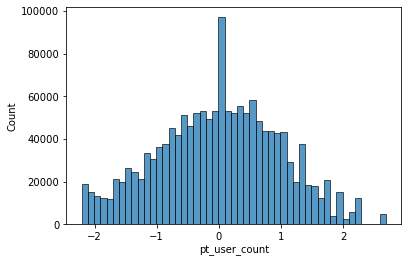

In [50]:
sns.histplot(data=combined_df, x = 'pt_user_count', binwidth=.1)

<AxesSubplot:xlabel='pt_user_mean', ylabel='Count'>

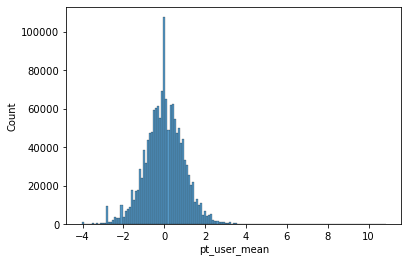

In [51]:
sns.histplot(data=combined_df, x = 'pt_user_mean', binwidth=.1)

In [52]:
combined_df.loc[:, 'deleted_user'] = (combined_df['author'] == '[deleted]').apply(int)
combined_df.loc[:, 'log_nword'] = (combined_df['selftext']).apply(lambda text: math.log10(len(str.split(text))))

In [53]:
#all done... let's drop unneccesary features and check the min/max of the ones we want
combined_df.columns

Index(['lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7',
       'lda_8', 'lda_9', 'lda_10', 'lda_11', 'lda_12', 'lda_13', 'lda_14',
       'lda_15', 'lda_16', 'created_date', 'score', 'controversiality',
       'selftext', 'author', 'author_flair_text', 'author_flair_css_class',
       'gilded', 'sentiment', 'objectivity', 'Stoicism', 'Physical_Violence',
       'Hostility', 'Homophobia', 'Sexual_Violence', 'Patriarchy', 'Belitting',
       'Racism', 'Flipping_the_Narrative', 'downvoted', 'pt_score',
       'moderator', 'user_count', 'user_mean', 'downvoted_user',
       'pt_user_count', 'pt_user_mean', 'deleted_user', 'log_nword'],
      dtype='object')

In [54]:
pd.isna(combined_df['author_flair_text']).sum()
#most users have flairtext - lets make the fact that they do a feature. 

813364

In [55]:
combined_df.loc[:,'user_flair'] =  (~pd.isna(combined_df['author_flair_text'])).apply(int)

In [56]:
combined_df.drop(columns = ['author', 'author_flair_text', 'author_flair_css_class', 'selftext', 'score', 'user_count', 'user_mean', 'created_date'], inplace=True)

In [57]:
combined_df.iloc[:,:17].describe()

,lda_0,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9,lda_10,lda_11,lda_12,lda_13,lda_14,lda_15,lda_16
count,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06
mean,5.598907e-02,5.218840e-02,5.601064e-02,7.662236e-02,6.131189e-02,4.996753e-02,4.019342e-02,3.236712e-02,2.836986e-02,4.143155e-02,4.242489e-02,6.060859e-02,6.406666e-02,5.742337e-02,1.195191e-01,6.783087e-02,4.964450e-02
std,1.191921e-01,1.157835e-01,1.216524e-01,1.490337e-01,1.308174e-01,1.072881e-01,9.019935e-02,7.769033e-02,7.315120e-02,9.096331e-02,9.495507e-02,1.235780e-01,1.333920e-01,1.221734e-01,1.941733e-01,1.342559e-01,1.088854e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.176896e-02,1.176739e-02,1.176922e-02,1.470661e-02,1.177116e-02,1.176982e-02,1.176695e-02,1.176515e-02,1.176491e-02,1.176725e-02,1.176701e-02,1.177956e-02,1.177327e-02,1.177096e-02,1.472057e-02,1.180195e-02,1.176787e-02
75%,2.941801e-02,2.941357e-02,2.941573e-02,5.882353e-02,2.941586e-02,2.941375e-02,2.941238e-02,1.963318e-02,1.961678e-02,2.941251e-02,2.941243e-02,2.942041e-02,2.942750e-02,2.941598e-02,1.869836e-01,5.882353e-02,2.941358e-02
max,9.916661e-01,9.859524e-01,9.916709e-01,9.714763e-01,9.696284e-01,9.940041e-01,9.993358e-01,9.988250e-01,9.607824e-01,9.982794e-01,9.275998e-01,9.551635e-01,9.972556e-01,9.874504e-01,9.943903e-01,9.938481e-01,9.572191e-01


In [58]:
combined_df.iloc[:,17:35].describe()

,controversiality,gilded,sentiment,objectivity,Stoicism,Physical_Violence,Hostility,Homophobia,Sexual_Violence,Patriarchy,Belitting,Racism,Flipping_the_Narrative,downvoted,pt_score,moderator,downvoted_user,pt_user_count
count,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06
mean,6.233849e-03,5.503771e-05,5.252166e-02,3.652273e-01,4.127165e-03,3.360417e-02,4.758375e-02,2.609981e-03,4.233262e-03,5.231898e-04,8.713199e-03,1.390465e-02,1.183642e-03,9.693931e-03,9.546403e-16,1.279792e-04,2.140503e-03,7.044598e-04
std,7.870827e-02,7.418539e-03,2.799622e-01,3.204611e-01,6.411033e-02,1.802081e-01,2.128839e-01,5.102128e-02,6.492568e-02,2.286737e-02,9.293699e-02,1.170953e-01,3.438375e-02,9.797941e-02,1.000000e+00,1.131207e-02,4.621604e-02,9.865265e-01
min,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.722403e+00,0.000000e+00,0.000000e+00,-2.206894e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.241998e-01,0.000000e+00,0.000000e+00,-6.854464e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,3.916667e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.121684e-01,0.000000e+00,0.000000e+00,2.630139e-02
75%,0.000000e+00,0.000000e+00,1.666667e-01,6.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.908915e-01,0.000000e+00,0.000000e+00,6.902708e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.622214e+00,1.000000e+00,1.000000e+00,2.626170e+00


In [59]:
combined_df.iloc[:,35:].describe()

,pt_user_mean,deleted_user,log_nword,user_flair
count,1.508057e+06,1.508057e+06,1.508057e+06,1.508057e+06
mean,-4.262834e-05,2.678413e-02,1.086845e+00,4.606543e-01
std,9.865174e-01,1.614520e-01,4.829260e-01,4.984497e-01
min,-4.046111e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.900929e-01,0.000000e+00,7.781513e-01,0.000000e+00
50%,-1.591552e-03,0.000000e+00,1.113943e+00,0.000000e+00
75%,6.115244e-01,0.000000e+00,1.397940e+00,1.000000e+00
max,1.081092e+01,1.000000e+00,3.240549e+00,1.000000e+00


In [60]:
#final shape of our analysis dataset:
combined_df.shape

(1508057, 39)

In [61]:
combined_df.to_pickle('../../data/combined_analysis_data.pkl')